In [1]:
import dascore as dc
from SpoolProcessing import proc,utils

# Define data path and dascore spool

In [2]:
#choose the folder of your dataset. The data format should be supported by dascore.
datapath = '/Users/gjin_a/Library/CloudStorage/OneDrive-ColoradoSchoolofMines/Research/Presentations/00 Previous Presentations/202305 DASRCN Workshop/Field Data/DASRCN_hammer'

# generate dascore folder spool from the datapath
sp = dc.spool(datapath)

# optional, if you only want to process a certain range of the dataset
sp = sp.select(time=('2023-05-31 17:18:33','2023-05-31 17:20:33'))

# optional, check whether the dataset has been successfully loaded 
display(sp.get_contents())


,cable_id,d_distance,d_time,data_category,data_type,dims,distance_max,distance_min,file_format,file_version,instrument_id,network,path,station,tag,time_max,time_min
0,,0.816762,0 days 00:00:00.000241111,,velocity,"time, distance",360.192001,0.816762,TERRA15,5,TrebleIISystem04,,/UTC-YMD20230531-HMS164210.544/DASRCN_hammer_v...,,,2023-05-31 17:20:33,2023-05-31 17:18:33


# Define pre-processing function (Optional)


 if the data need to be pre-processed before the standard diviation calculation, you can define a pre-process 
 function here. It is important to include **kargs as the function input. The pre-process function must return
 a dascore patch object.

In [3]:

# In this case, because the data were recorded using Terra15 interrogator in velocity format, a velocity to 
# strain rate conversion is needed. 

def pre_fun(patch, **kargs):
    return patch.tran.velocity_to_strain_rate()

# Processing

In [4]:
# the actual function that run the processing. The processed output will be saved in the output folder 
# with dascore format.

# define output folder
output_folder = './STDtest/'

# run processing. The pre_process keyword can be removed if not needed.
proc.std(sp,output_folder,pre_process=pre_fun);

Found 1 continuous datasets


Spool Loop: 0it [00:00, ?it/s]

Patch Loop:   0%|          | 0/120 [00:00<?, ?it/s]

processing succeeded


# Check the processing results

In [5]:
# read in the processed data, merge all the data together
# if there are data gaps, the processed data will be seperated into different continuous patches. 
proc_sp = dc.spool('./STDtest').chunk(time=None)
proc_sp.get_contents()

Output()

,time_min,time_max,cable_id,d_distance,d_time,data_category,data_type,dims,distance_max,distance_min,instrument_id,network,station,tag,_group
0,2023-05-31 17:18:33.499876224,2023-05-31 17:20:32.499916416,,0.816762,0 days 00:00:00.999665920,,strain_rate,"distance,time",359.375239,0.816762,TrebleIISystem04,,,,0_0


In [6]:
# get the processed data
proc_data = proc_sp[0]


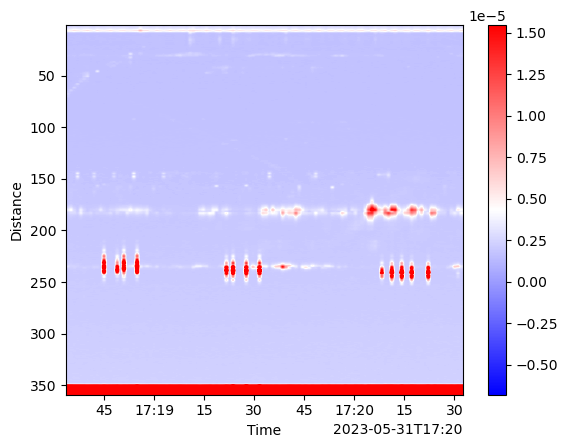

In [7]:
# plot the waterfall of the processed data
proc_data.viz.waterfall(scale=1e-1)
plt.show()